### Edgar Moises Hernandez-Gonzalez
#### 12/12/19
#### Clasificacion de coeficientes DWT de MI-EEG con CNN-1D
##### 10 ejecuciones independientes para obtener la media y desviacion estandar

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/MI-EEG-DWT-Coef-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/MI-EEG-DWT-Coef-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/EtiquetasA01E.csv", header=None)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 22286)
(288, 22286)
(288, 1)
(288, 1)


In [6]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [7]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
#convertir de 2D a 3D
x_train = x_train.reshape((n_samples_train, 22, 1013))
x_test = x_test.reshape((n_samples_test, 22, 1013))

print(x_train.shape)
print(x_test.shape)

(288, 22, 1013)
(288, 22, 1013)


In [11]:
x_train = np.transpose(x_train, (0,2,1))
x_test = np.transpose(x_test, (0,2,1))

print(x_train.shape)
print(x_test.shape)

(288, 1013, 22)
(288, 1013, 22)


Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
288/288 [==============================] - 0s 279us/sample - loss: 2.8293 - acc: 0.4236
kappa:  0.2314814814814815
confusion matrix:
 [[21 23 22  6]
 [21 38 11  2]
 [12  6 35 19]
 [ 8  6 30 28]]
(0.43137284721465013, 0.4236111111111111, 0.42257008865687373, None)


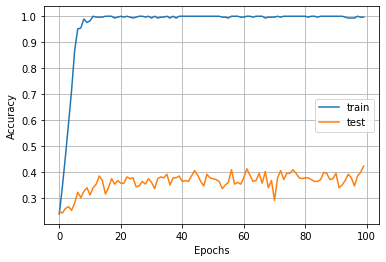

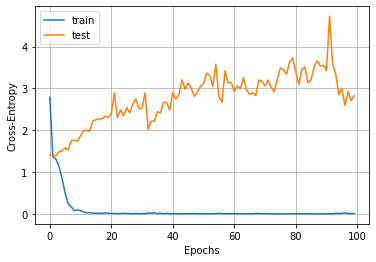

Iteration: 2
288/288 [==============================] - 0s 274us/sample - loss: 3.2478 - acc: 0.4410
kappa:  0.25462962962962965
confusion matrix:
 [[20 32 14  6]
 [17 52  3  0]
 [ 9  8 35 20]
 [ 6  3 43 20]]
(0.43379686674881185, 0.4409722222222222, 0.42586996591835463, None)


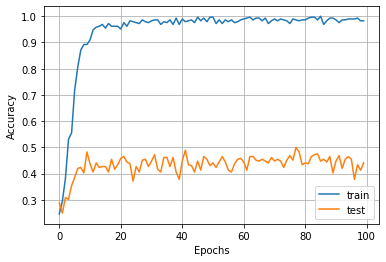

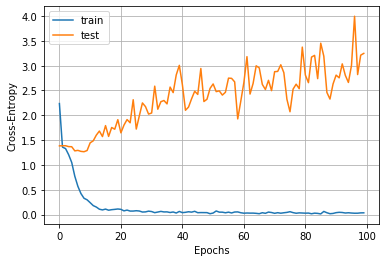

Iteration: 3
288/288 [==============================] - 0s 268us/sample - loss: 2.7442 - acc: 0.4167
kappa:  0.2222222222222222
confusion matrix:
 [[38 13 15  6]
 [38 25  8  1]
 [15  9 32 16]
 [13  4 30 25]]
(0.4382211538461539, 0.41666666666666663, 0.41565805640685244, None)


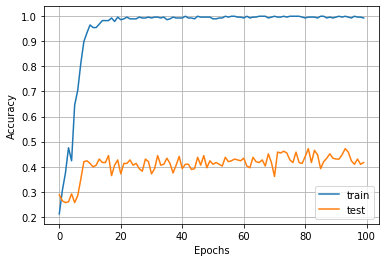

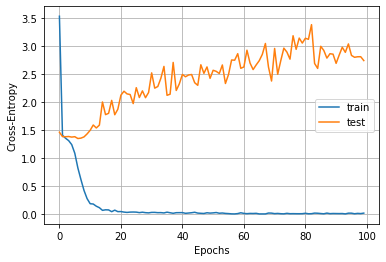

Iteration: 4
288/288 [==============================] - 0s 252us/sample - loss: 3.2132 - acc: 0.4479
kappa:  0.26388888888888884
confusion matrix:
 [[20 23 21  8]
 [21 42  9  0]
 [ 6  5 37 24]
 [ 5  6 31 30]]
(0.44966723792821295, 0.4479166666666667, 0.4433008811014419, None)


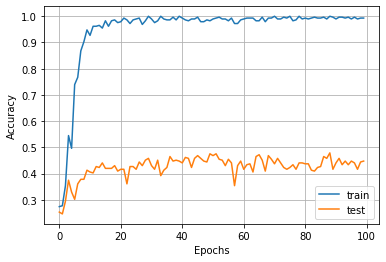

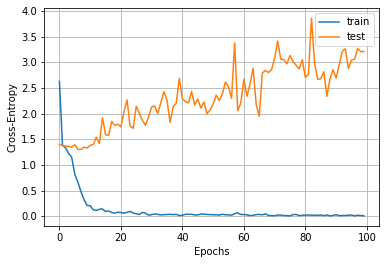

Iteration: 5
288/288 [==============================] - 0s 280us/sample - loss: 3.0129 - acc: 0.3854
kappa:  0.18055555555555558
confusion matrix:
 [[22 29 11 10]
 [22 39  6  5]
 [19 13 16 24]
 [11 10 17 34]]
(0.377905537631565, 0.38541666666666663, 0.3777895173960636, None)


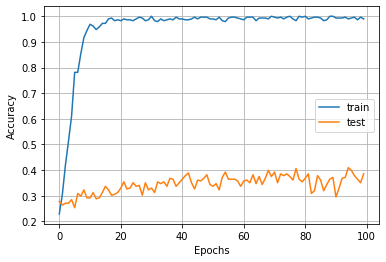

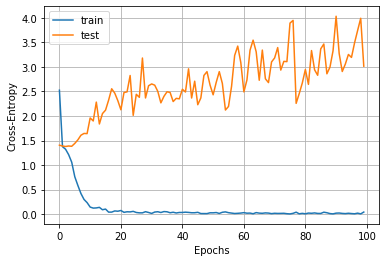

Iteration: 6
288/288 [==============================] - 0s 265us/sample - loss: 2.8958 - acc: 0.3993
kappa:  0.19907407407407407
confusion matrix:
 [[30  9 14 19]
 [38 18  7  9]
 [15  4 16 37]
 [ 8  1 12 51]]
(0.41458902858225516, 0.3993055555555556, 0.38031700176744143, None)


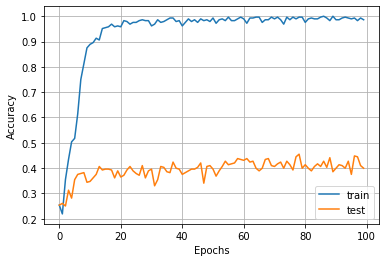

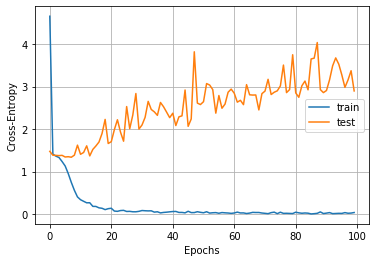

Iteration: 7
288/288 [==============================] - 0s 260us/sample - loss: 3.4650 - acc: 0.3507
kappa:  0.1342592592592593
confusion matrix:
 [[27 24 16  5]
 [24 27 10 11]
 [15 13 28 16]
 [14 14 25 19]]
(0.3526583113771312, 0.3506944444444444, 0.34876679361948726, None)


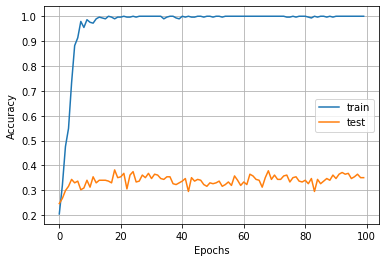

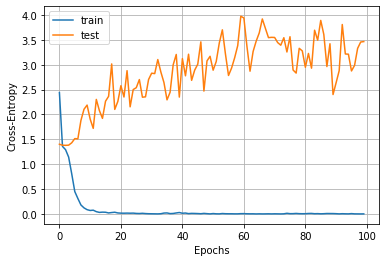

Iteration: 8
288/288 [==============================] - 0s 270us/sample - loss: 3.8585 - acc: 0.4201
kappa:  0.22685185185185186
confusion matrix:
 [[23 24  1 24]
 [27 38  0  7]
 [10  7  2 53]
 [11  3  0 58]]
(0.4817097026604069, 0.4201388888888889, 0.361211376888947, None)


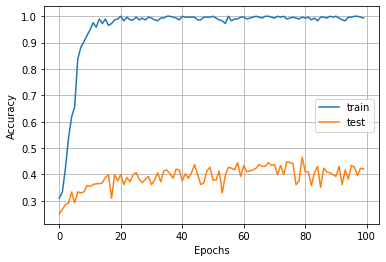

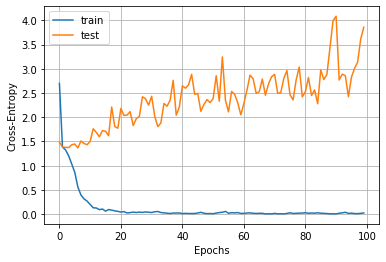

Iteration: 9
288/288 [==============================] - 0s 266us/sample - loss: 3.1408 - acc: 0.4410
kappa:  0.25462962962962965
confusion matrix:
 [[42  9 15  6]
 [49 22  1  0]
 [22  1 25 24]
 [19  0 15 38]]
(0.5027334797555385, 0.4409722222222222, 0.4420809429541047, None)


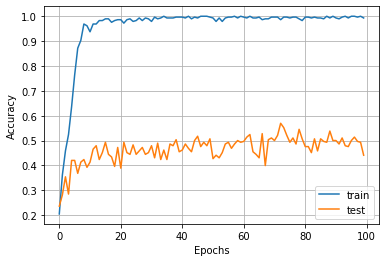

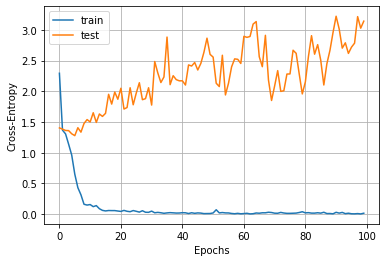

Iteration: 10
288/288 [==============================] - 0s 252us/sample - loss: 2.3538 - acc: 0.4306
kappa:  0.2407407407407407
confusion matrix:
 [[31 12 20  9]
 [38 22 10  2]
 [11  2 42 17]
 [ 9  4 30 29]]
(0.4547128106121218, 0.4305555555555556, 0.42758033358735914, None)


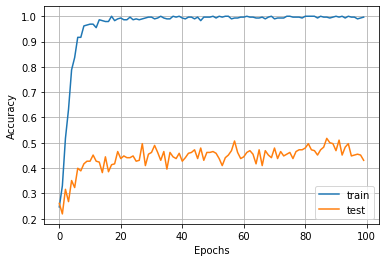

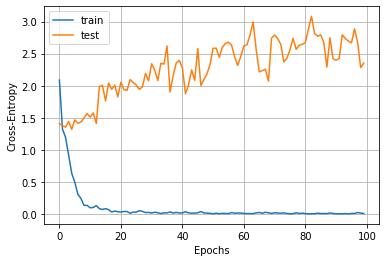


Resultados:
loss: [2.8292563756306968, 3.2478173043992786, 2.744175566567315, 3.213241312238905, 3.0128874513838024, 2.8957987361484103, 3.4650422467125788, 3.858518679936727, 3.140845431221856, 2.353765222761366]
accuracy: [0.4236111, 0.4409722, 0.41666666, 0.44791666, 0.38541666, 0.39930555, 0.35069445, 0.4201389, 0.4409722, 0.43055555]
kappa: [0.2314814814814815, 0.25462962962962965, 0.2222222222222222, 0.26388888888888884, 0.18055555555555558, 0.19907407407407407, 0.1342592592592593, 0.22685185185185186, 0.25462962962962965, 0.2407407407407407]
precision: [0.43137284721465013, 0.43379686674881185, 0.4382211538461539, 0.44966723792821295, 0.377905537631565, 0.41458902858225516, 0.3526583113771312, 0.4817097026604069, 0.5027334797555385, 0.4547128106121218]
recall: [0.4236111111111111, 0.4409722222222222, 0.41666666666666663, 0.4479166666666667, 0.38541666666666663, 0.3993055555555556, 0.3506944444444444, 0.4201388888888889, 0.4409722222222222, 0.4305555555555556]
f1: [0.42257008865

In [12]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(10):
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(Conv1D(16,7, activation='relu', input_shape=(1013,22)))
    model.add(MaxPool1D(2))
    model.add(Conv1D(32,7, activation='relu'))
    model.add(MaxPool1D(2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [15]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 1007, 16)          2480      
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 503, 16)           0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 497, 32)           3616      
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 248, 32)           0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 7936)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               1015936   
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)              

In [16]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.4156
std: (+/- 0.0283)
kappa: 0.2208
precision: 0.4337
recall: 0.4156
f1: 0.4045
